# Machine Learning Advanced

## Aprendizaje Supervisado - Boosting

Manuel Montoya - `manuel.montoya@pucp.edu.pe`

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

Loan Prediction: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## librerias

In [1]:
import random
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.3'

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
sns.__version__

'0.11.0'

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [5]:
seed = 2021

In [6]:
target = 'Loan_Status'

## bases

In [7]:
train = pd.read_csv('train_preprocesed.csv')
test = pd.read_csv('test_preprocesed.csv')

In [8]:
train.shape, test.shape

((491, 17), (123, 17))

In [9]:
X_train = train.drop(target, axis = 1)
y_train = train[target]

X_test = test.drop(target, axis = 1)
y_test = test[target]

In [10]:
X_train.shape, y_train.shape

((491, 16), (491,))

In [11]:
X_test.shape, y_test.shape

((123, 16), (123,))

## XGboost

In [12]:
import xgboost as xgb

/Users/manuel/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test,   label = y_test)

In [14]:
parameters = {'objective': 'binary:logistic',
              'learning_rate': 0.05,
              'max_depth': 4,
              'min_child_weight': 0.5,
              'reg_alpha': 5,
              'reg_lambda': 5,
              'eval_metric': 'auc'}

watch_list  = [(dtrain,'train'),(dtest,'test')]

xgb_fit = xgb.train(params = parameters, dtrain = dtrain, evals = watch_list, 
                    num_boost_round = 500, early_stopping_rounds=50, verbose_eval=1)

[0]	train-auc:0.77463	test-auc:0.68266
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.77485	test-auc:0.68328
[2]	train-auc:0.77496	test-auc:0.68359
[3]	train-auc:0.77857	test-auc:0.68034
[4]	train-auc:0.78394	test-auc:0.69195
[5]	train-auc:0.78400	test-auc:0.69195
[6]	train-auc:0.78420	test-auc:0.69195
[7]	train-auc:0.78414	test-auc:0.69195
[8]	train-auc:0.79247	test-auc:0.70356
[9]	train-auc:0.79252	test-auc:0.70341
[10]	train-auc:0.79252	test-auc:0.70341
[11]	train-auc:0.79257	test-auc:0.70341
[12]	train-auc:0.79252	test-auc:0.70341
[13]	train-auc:0.79257	test-auc:0.70341
[14]	train-auc:0.79252	test-auc:0.70341
[15]	train-auc:0.79252	test-auc:0.70341
[16]	train-auc:0.84160	test-auc:0.74133
[17]	train-auc:0.84160	test-auc:0.74133
[18]	train-auc:0.84168	test-auc:0.74133
[19]	train-auc:0.84376	test-auc:0.74551
[20]	train-auc:0.84357	test-auc:0.74520
[21]	train-auc:0.84472	test-a

Importancia de variables

Feature importances XGBoost: https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7

In [15]:
frame = {'Gain':  xgb_fit.get_score(importance_type='gain'), # ganancia en prediccion por la variable
        'Cover':  xgb_fit.get_score(importance_type='cover'),# profundidad del arbol 
        'Weight': xgb_fit.get_score(importance_type='weight')} # en cuantos arboles sale la variable

result = pd.DataFrame(frame) 
result 

,Gain,Cover,Weight
Credit_History,9.774698,79.240449,139
ApplicantIncome,0.270112,29.014014,190
%Cuota,0.952670,45.736438,149
CoapplicantIncome,0.716640,30.272749,147
TotalIncome,1.307985,58.201488,87
Cuota,0.373173,28.615293,26
TotalIncomeByPerson,0.653655,29.690593,139
Loan_Amount_Term,0.253876,27.438861,59
Married_Yes,0.478218,40.172009,27
Property_Area_Semiurban,0.357745,72.430548,38


## LightGBM

LightGBM: https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [17]:
import lightgbm as lgbm

In [18]:
dtrain = lgbm.Dataset(X_train, y_train)
dtest = lgbm.Dataset(X_test, y_test)

In [23]:
params = {'objective':'binary', 
          'metric': 'auc', 
          'max_depth': 10, 
          'num_leaves':50,
           'reg_alpha': 1,
          'reg_lambda': 1,}

In [24]:
lgbm_booster = lgbm.train(params = params, train_set = dtrain, 
                     num_boost_round = 3000, early_stopping_rounds = 50,
                     valid_names = ['train', 'test'], valid_sets = [dtrain, dtest], 
                     verbose_eval = 1)

[1]	train's auc: 0.845957	test's auc: 0.728947
Training until validation scores don't improve for 50 rounds
[2]	train's auc: 0.856035	test's auc: 0.742415
[3]	train's auc: 0.855804	test's auc: 0.746749
[4]	train's auc: 0.855804	test's auc: 0.74613
[5]	train's auc: 0.855187	test's auc: 0.750464
[6]	train's auc: 0.869841	test's auc: 0.749845
[7]	train's auc: 0.871219	test's auc: 0.750464
[8]	train's auc: 0.882346	test's auc: 0.765944
[9]	train's auc: 0.887462	test's auc: 0.769195
[10]	train's auc: 0.891017	test's auc: 0.758978
[11]	train's auc: 0.897058	test's auc: 0.755108
[12]	train's auc: 0.900757	test's auc: 0.766718
[13]	train's auc: 0.902674	test's auc: 0.759598
[14]	train's auc: 0.908571	test's auc: 0.778019
[15]	train's auc: 0.913956	test's auc: 0.776935
[16]	train's auc: 0.916885	test's auc: 0.783746
[17]	train's auc: 0.923831	test's auc: 0.784365
[18]	train's auc: 0.925142	test's auc: 0.777864
[19]	train's auc: 0.927531	test's auc: 0.783127
[20]	train's auc: 0.930132	test's auc

Feature importances LightGBM: 

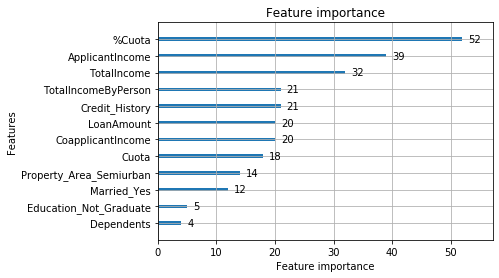

In [25]:
lgbm.plot_importance(lgbm_booster)